### Create mini population 01

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from IPython.display import HTML
from itertools import product

def print_color(text, color="black", font_weight="normal", font_style="normal", font_size="small"): 
    display(HTML(f'<span style="color: {color};font-weight: {font_weight}; font-style: {font_style}; font-size: {font_size};">{text}</span>'))

,Height,Count,Probability
0,63.33,1,0.0625
1,66.67,4,0.2500
2,70.00,6,0.3750
3,73.33,4,0.2500
4,76.67,1,0.0625


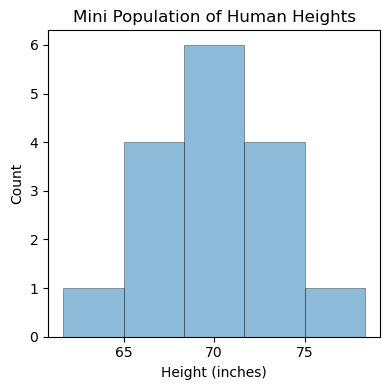

Unique elements: [63.33 66.67 70.   73.33 76.67]
Total count of elements: 16
Mean: 70.0
Std: 3.33


In [18]:
lowest_height_mini_pop_01= 55
mean_height_mini_pop_01 = 70
highest_height_mini_pop_01 = 85
std_height_mini_pop_01 = 3
num_bars_mini_pop_01 = 100
approx_num_bars_mini_pop_01=9
approx_total_count_mini_pop_01=15

def normal_distribution(x, mu, sigma):
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

def create_mini_population(f_normal_distribution, start, end, n_bins, total_count, mean_height, std_height):
    bin_edges = np.linspace(start, end, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    bin_centers = np.round(bin_centers, 2)  # Round bin_centers to two decimal places
    bin_width = (end - start) / n_bins
    densities = np.array([np.mean(f_normal_distribution(np.linspace(edge, bin_edges[i+1], 100), mean_height, std_height)) for i, edge in enumerate(bin_edges[:-1])])
    float_counts = densities * total_count / sum(densities)
    int_counts = np.round(float_counts).astype(int)
    non_zero_indices = int_counts != 0
    bin_centers = bin_centers[non_zero_indices]
    int_counts = int_counts[non_zero_indices]
    probabilities = int_counts / sum(int_counts)  # Calculate probabilities
    return pd.DataFrame({'Height': bin_centers, 'Count': int_counts, 'Probability': probabilities})

def plot_mini_population(df, ax, label):
    centers = df['Height']
    counts = df['Count']
    bin_width = centers.iloc[1] - centers.iloc[0]
    ax.bar(centers, counts, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
    
def calculate_weighted_mean(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    return weighted_mean

def calculate_weighted_std(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    squared_deviations = ((df_col_value - weighted_mean) ** 2) * df_col_count
    weighted_variance = squared_deviations.sum() / df_col_count.sum()
    weighted_std = np.sqrt(weighted_variance)
    return weighted_std


# Create mini (discretized) population
df_mini_pop_01 = create_mini_population(normal_distribution, lowest_height_mini_pop_01, highest_height_mini_pop_01, 
                                        approx_num_bars_mini_pop_01, approx_total_count_mini_pop_01, mean_height_mini_pop_01, std_height_mini_pop_01)

# Display mini population
display(df_mini_pop_01)

# Plot mini population
fig, ax = plt.subplots(figsize=(4, 4))
plot_mini_population(df_mini_pop_01, ax, "Population 1")
ax.set_title('Mini Population of Human Heights')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Summary
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

### Mini pop 02 = mini population with same effect added to each element (e.g, growth hormone)

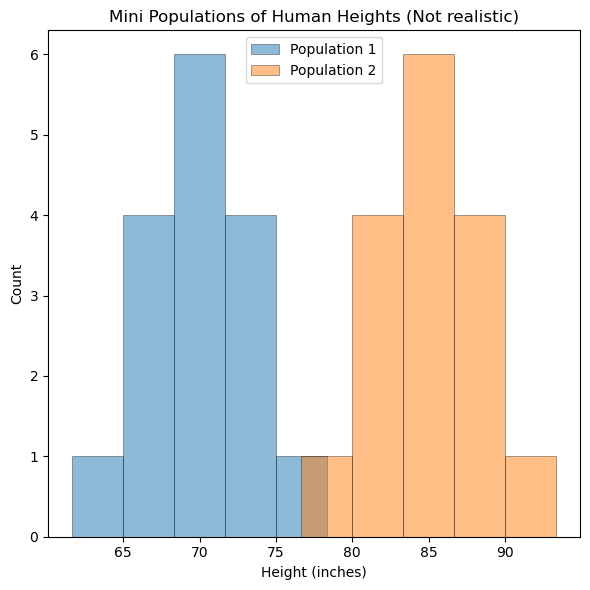

In [25]:
effect = 15

def plot_two_mini_pops(df1, df2):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot the first mini population
    plot_mini_population(df1, ax, "Population 1")
    
    # Plot the second mini population
    plot_mini_population(df2, ax, "Population 2")
    
    ax.set_title('Mini Populations of Human Heights (Not realistic)')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Count')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
df_mini_pop_02 = df_mini_pop_01.copy(deep=True)
df_mini_pop_02["Height"] = df_mini_pop_02["Height"] + effect
plot_two_mini_pops(df_mini_pop_01, df_mini_pop_02)

### SDSM mini pop 01

,Mean_rectified,Count,Probability
0,63.3,1,9.536743e-07
1,64.0,5,1.907349e-05
2,64.7,15,1.811981e-04
3,65.3,35,1.087189e-03
4,66.0,70,4.620552e-03
5,66.7,121,1.478577e-02
6,67.3,185,3.696442e-02
7,68.0,255,7.392883e-02
8,68.7,320,1.201344e-01
9,69.3,365,1.601791e-01


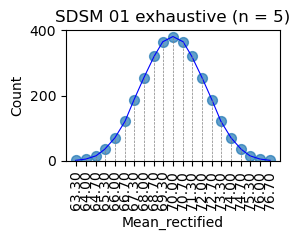

Mini pop mean: 70.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49


In [19]:
sample_size_mini_pop_01 = 5
decimal_places_rounding = 2
repetitions_montecarlo = 10000

def calculate_SDSM_exhaustive(df, sample_size): # We must take into account the probabilities!
    unique_heights = df['Height'].values
    unique_probabilities = df['Probability'].values
    # Generate all possible combinations
    all_combs = list(product(unique_heights, repeat=sample_size))
    # Calculate their probabilities and mean
    probabilities = []
    means = []
    for comb in all_combs:
        prob = np.prod([unique_probabilities[np.where(unique_heights == x)[0][0]] for x in comb])
        mean = np.mean(comb)
        probabilities.append(prob)
        means.append(mean)
    # Create df_combinations
    df_combinations = pd.DataFrame({
        'Combination': all_combs,
        'Mean': means,
        'Probability': probabilities
    })
    # Calculate empirical SE (
    empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    return df_combinations, empirical_SE

def rectify_means(df, decimal_places=2):
    # Rectify the means by rounding
    df['Mean_rectified'] = df['Mean'].round(decimal_places)
    if 'Probability' in df.columns:
        # Group by the rectified mean and sum the probabilities
        grouped_df = df.groupby('Mean_rectified').agg(
            Count=pd.NamedAgg(column='Mean', aggfunc='size'),
            Probability=pd.NamedAgg(column='Probability', aggfunc='sum')
        ).reset_index()
        probabilities = grouped_df['Probability'].values
    else:
        # Group by the rectified mean and count the occurrences
        grouped_df = df.groupby('Mean_rectified').agg(
            Count=pd.NamedAgg(column='Mean', aggfunc='size')
        ).reset_index()
        # Create a Probability column based on the counts
        total_count = grouped_df['Count'].sum()
        grouped_df['Probability'] = grouped_df['Count'] / total_count
        probabilities = grouped_df['Probability'].values
    # Calculate the weighted mean of Mean_rectified
    mean_rectified_values = grouped_df['Mean_rectified'].values
    weighted_mean = np.sum(probabilities * mean_rectified_values)
    # Calculate the weighted standard deviation of Mean_rectified
    weighted_var = np.sum(probabilities * (mean_rectified_values - weighted_mean)**2)
    weighted_std = np.sqrt(weighted_var)
    return grouped_df, weighted_std

def plot_sdsm(df_grouped, sample_size, title, column_name='Mean_rectified'):
    # Since df_grouped is already grouped and contains counts, no need to group again
    mean_counts = df_grouped
    # Plotting
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.scatter(mean_counts[column_name], mean_counts['Count'], alpha=0.7, s=50)
    ax.plot(mean_counts[column_name], mean_counts['Count'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row[column_name], row[column_name]], [0, row['Count']], linestyle='--', color='grey', linewidth=0.5)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(title)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    if len(mean_counts[column_name]) > 30:
        ax.set_xticks(np.linspace(mean_counts[column_name].min(), mean_counts[column_name].max(), 10))
    else:
        ax.set_xticks(mean_counts[column_name].values)
    ax.set_ylim(0,)
    if len(mean_counts[column_name]) > 4:
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    
def compare_empirical_estimated_SE(mean_pop, empirical_SE, pop_std, sample_size):
    theoretical_SE = pop_std / np.sqrt(sample_size)
    print(f"Mini pop mean: {mean_pop:.2f}")
    print(f"Mini pop std: {pop_std:.2f}")
    print(f"SDSM sample size: {sample_size}")
    print(f"SDSM empirical SE: {empirical_SE:.2f}")
    print(f"SDSM theoretical SE (from mini pop std): {theoretical_SE:.2f}")
    print_color(f"SDSM empirical SE / theoretical SE: {(empirical_SE/theoretical_SE) * 100:.2f}%", "black", "bold", "italic", "small")
    
print('')
print_color('SDSM mini pop 01 estimated by the exhaustive method:', "black", "bold", font_size="large")
df_sdsm_mini_pop_01_exhaustive, _ = calculate_SDSM_exhaustive(df_mini_pop_01, sample_size_mini_pop_01)
df_sdsm_mini_pop_01_exhaustive_rectified, SE_sdsm_mini_pop_01_exhaustive_rectified = rectify_means(df_sdsm_mini_pop_01_exhaustive, decimal_places=1)
display(df_sdsm_mini_pop_01_exhaustive_rectified)
plot_sdsm(df_sdsm_mini_pop_01_exhaustive_rectified, sample_size_mini_pop_01, f"SDSM 01 exhaustive (n = {sample_size_mini_pop_01})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_sdsm_mini_pop_01_exhaustive_rectified, std_mini_pop_01, sample_size_mini_pop_01)

### SDSM mini pop 02

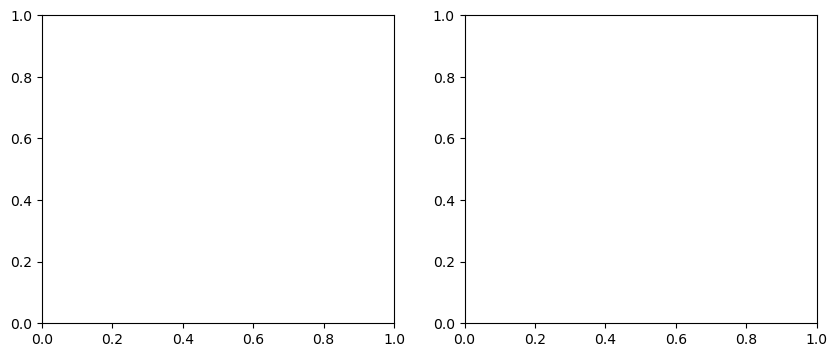

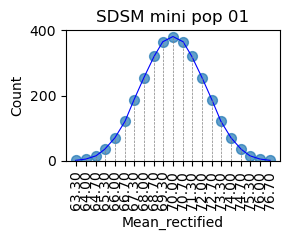

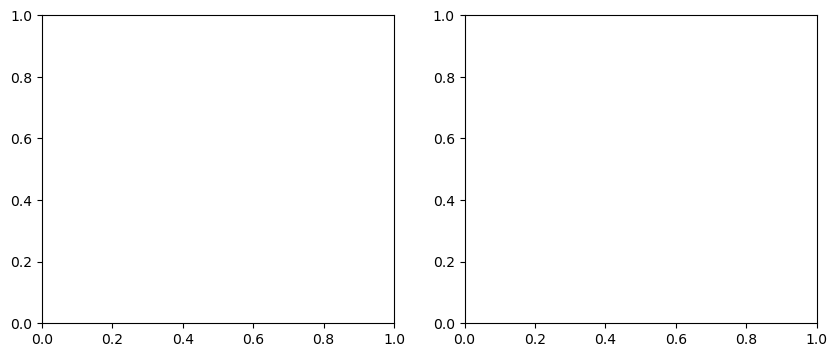

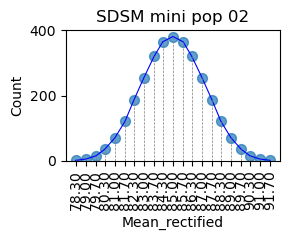

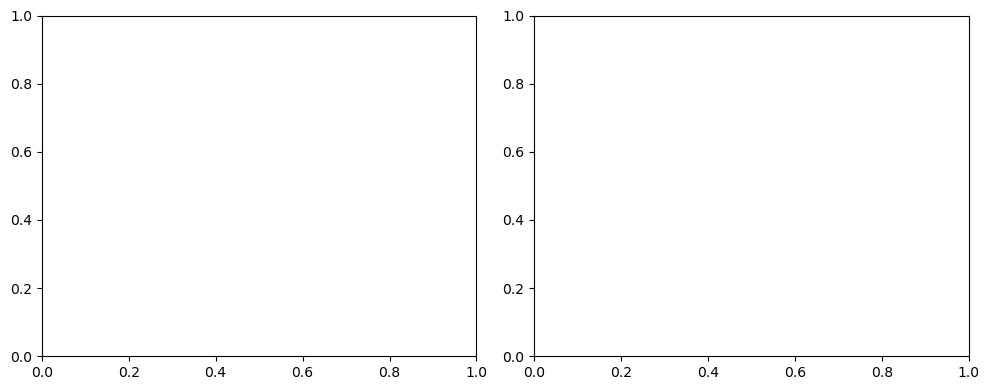

In [30]:
df_sdsm_mini_pop_02_exhaustive_rectified = df_sdsm_mini_pop_01_exhaustive_rectified.copy(deep=True)
df_sdsm_mini_pop_02_exhaustive_rectified["Mean_rectified"] = df_sdsm_mini_pop_02_exhaustive_rectified["Mean_rectified"] + effect  
sample_size_mini_pop_02 = sample_size_mini_pop_01

def plot_two_sdsm(df_grouped1, sample_size1, title1, column_name1,
                  df_grouped2, sample_size2, title2, column_name2):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # Plot the first graph
    plot_sdsm(df_grouped1, sample_size1, title1, column_name1)
    plt.sca(ax1)  # Set the current axis to ax1
    # Plot the second graph
    plot_sdsm(df_grouped2, sample_size2, title2, column_name2)
    plt.sca(ax2)  # Set the current axis to ax2
    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_two_sdsm(df_sdsm_mini_pop_01_exhaustive_rectified, sample_size_mini_pop_01, "SDSM mini pop 01", "Mean_rectified",
                  df_sdsm_mini_pop_02_exhaustive_rectified, sample_size_mini_pop_02, "SDSM mini pop 02", "Mean_rectified")

TypeError: plot_sdsm() takes from 3 to 4 positional arguments but 5 were given

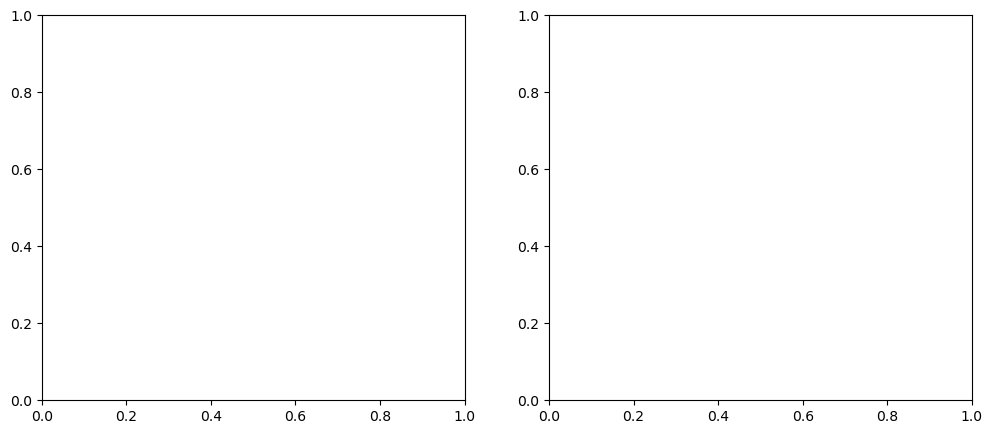

In [32]:
def plot_sdsm(df_grouped, sample_size, title, column_name='Mean_rectified'):
    # Since df_grouped is already grouped and contains counts, no need to group again
    mean_counts = df_grouped
    # Plotting
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.scatter(mean_counts[column_name], mean_counts['Count'], alpha=0.7, s=50)
    ax.plot(mean_counts[column_name], mean_counts['Count'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row[column_name], row[column_name]], [0, row['Count']], linestyle='--', color='grey', linewidth=0.5)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(title)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    if len(mean_counts[column_name]) > 30:
        ax.set_xticks(np.linspace(mean_counts[column_name].min(), mean_counts[column_name].max(), 10))
    else:
        ax.set_xticks(mean_counts[column_name].values)
    ax.set_ylim(0,)
    if len(mean_counts[column_name]) > 4:
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    

def plot_single_sdsm_figure(df_grouped1, sample_size1, title1, column_name1,
                            df_grouped2, sample_size2, title2, column_name2):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first graph
    plot_sdsm(ax1, df_grouped1, sample_size1, title1, column_name1)
    
    # Plot the second graph
    plot_sdsm(ax2, df_grouped2, sample_size2, title2, column_name2)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

    # Dummy data for demonstration
df_grouped1 = pd.DataFrame({'Mean_rectified': [1.0, 1.5, 2.0], 'Count': [10, 20, 30]})
df_grouped2 = pd.DataFrame({'Mean_rectified': [0.5, 1.0, 1.5], 'Count': [5, 15, 25]})

# Call the function to plot both graphs in a single figure
plot_single_sdsm_figure(df_grouped1, 100, "Title 1", "Mean_rectified",
                        df_grouped2, 100, "Title 2", "Mean_rectified")
